In [2]:
import tensorflow as tf
import numpy as np
sess = tf.Session()

# Funciones Basicas de TensorFlow

## Introduccion

TensorFlow propone un modelo computacional distinto al normalmente usado: la computacion simbolica. Mas adelante veremos que significa esto, pero por ahora solo veamos un ejemplo de una computacion en python estadar

In [3]:
w = 1.0  #parametro
b = 2.0  #parametro

def f(x):  # x es un input
    return w * x + b

f(1) # w * x + b == 1.0 * 1.0 + 2.0 == 3.0

3.0

Aqui diremos que `f` es una funcion de `x` que esta parametrizada por las variables `w` y `b`. Esto lo podriamos escribir matematicamente de la siguiente forma:

# $f(x; w,b) = w x + b$

Esto quiere decir que si bien `w` y `b` no son parte de los argumentos de `f`, si determinan su comportamiento. Si cambiamos `w` o `b` tambien cambiara el valor de `f` dado cierto `x`. Modifiquemos `b` a `10.0` a ver esto en accion:

In [4]:
b = 10.0

f(1) # w * x + b == 1.0 * 1.0 + 10.0 == 11.0

11.0

Como es de esperarse, el valor de `f` cambio. Durante el resto del notebook veremos lo necesario para recrear esto en TensorFlow

## Import

Por convension se importa `tensorflow` como `tf`

In [5]:
import tensorflow as tf

## Tensores
Un tensor es un arreglo multidimensional. Por ejemplo los vectores son tensores de `1` dimension, las matrices son tensores de dimension `2`, y los escalares son tensores de `0` dimensiones. Asi mismo podemos crear tensores de mayores dimensiones, por ejemplo, las imagenes se pueden representar como un tensor de dimension `3`. 

## Constantes
El tensor mas simple de TensorFlow es un tensor constante. Para crear uno utilizamos `tf.constant`

In [6]:
c = tf.constant(5.0)

c

<tf.Tensor 'Const:0' shape=() dtype=float32>

El print anterior nos esta mostrando que creamos un Tensor escalar de tipo `float32`, esto lo sabemos porque su shape/forma es `()`. Sin embargo, como vemos este tensor constante `c` no parece indicarnos el valor que contiene o representa, esto es porque como veremos a continuacion en TensorFlow para extraer el valor de un tensor primero tenemos crear una session y correr el tensor en ella.

## Session

In [14]:
sess = tf.Session()

sess.run(c)

5.0

Como vemos, utilizando el metodo `.run` de `tf.Session` pudimos evaluar el valor de `c`! Ahora bien, veamos como crear operaciones un poco mas complejas. Al igual que en numpy los tensores sobrecargan la mayoria de los operadores de python y esto nos permiten crear nuevos tensores facilmente. Por ejemplo:

In [32]:
k = c * 12.0

k

Tensor("mul_7:0", shape=(), dtype=float32)


Aqui creamos `k` a partir de `c` y el numero `12.0`. Lo interesante es que el `print` nos da una pista de que `k` es un tensor de tipo "mul", esto se debe a que representa la operacion de multiplicacion. Para recuperar el valor de `k` debemos ejecutarlo en la session denuevo.

In [33]:
sess.run(k)

60.0

## Placeholder
Hasta ahora solo hemos creado expresiones constantes y esto no es tan util. Para introducir entradas del exterior a las expresiones debemos crear un tensor tipo `placeholder`

In [34]:
x = tf.placeholder(tf.float32, ())
y = x * 2.0

y

Tensor("mul_8:0", shape=(), dtype=float32)


Ok, definimos un tensor sin ningun valor y creamos un operacion a partir de el, ¿pero que pasara si lo evaluamos en la session?

In [35]:
try:
    sess.run(y)
except:
    print("Error!")

Error!


Como vemos obtenemos un error, esto es porque tensorflow necesita que definamos un valor para `x` dentro del grafo para poder calcular el valor de `y`. Esto lo hacemos pasando un diccionario de tensores a valores al parametro `feed_dict` de `run`

In [36]:
valores = {x:  9.0}

float(sess.run(y, valores))

18.0


### 

## Variable
Hemos creados expresiones "puras" en el sentido que dados los mismo valores para los `placeholders` siempre data los mismo valores para el resto de los tensores, en otras palabras, no hay estado. Para tener sistemas que guarden estado utilizamos `Variable`. Creemos una variable sensilla

In [37]:
a = tf.Variable(1.0)

a

Tensor("Variable_5/read:0", shape=(), dtype=float32)


Aqui creamos una variable con un valor inicial de `1.0`, sin embargo las variables son un poco diferentes al resto de los tensores en el sentido que deben ser inicializadas, esto posiblemente es para reservar memoria en el dispositivo que vaya a almacenar esta variable, si no lo hacemos e intentamos evaluar una expresion tendremos errores

In [38]:
try:
    print(sess.run(a))
except:
    print("Error!")

Error!


Para iniciar las variables corremos `tf.global_variables_initializer()`

In [39]:
init = tf.global_variables_initializer()
sess.run(init)

Esta operacion no retorna nada pero como efecto secundario inicia las variables. Ahora si corremos `a` podemos obtener su valor

In [40]:
sess.run(a)

1.0

Como dijimos el proposito de tener variables es poder almacener y lo mas importante actualizar cierto estado, de otra manera parecen constantes. Por lo tanto vamos a definir la operacion

$a := a * 2.0$

en TensorFlow

In [41]:
update = a.assign(a * 2.0) #a = a * 2

Ahora si corremos `a` veremos que

In [42]:
sess.run(a)

1.0

...sigue igual. Esto es porque debemos correr el tensor `update` para que `a` se actualice

In [43]:
sess.run(update)

print sess.run(a)

2.0


Perfecto! Si volvemos a correr la celda anterior varias veces veremos que `a` se va duplicando cada vez. 

## Uniendo Todo
Ahora estamos preparados para recrear nuestra funcion `f` original en tensorflow

In [44]:
w = tf.Variable(1.0) #parametro
b = tf.Variable(2.0) #parametro

x = tf.placeholder(tf.float32, []) #input

f = w * x + b  # f(x; w, b)

#iniciar variables
sess.run(tf.global_variables_initializer())

# f(1.0)
sess.run(f, feed_dict={x: 1.0})

3.0

Genial! Reproducimos el resultado original de python. Ahora nos falta modificar `b` a `10.0` como lo hicimos en anteriormente y ver como cambia `f`

In [45]:
# b = 10.0
sess.run(tf.assign(b, 10.0))

# f(1.0)
sess.run(f, feed_dict={x: 1.0})

11.0

# Tareas
**1)** Crear un Tensor que represente la funcion 

$ f(x) = 3x^3 - 5x + 10 $

Correcto!


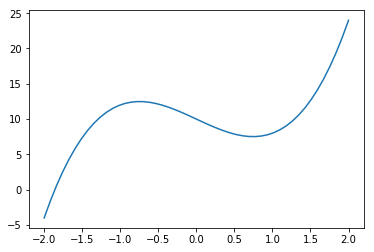

In [8]:
import numpy as np
from matplotlib import pyplot as plt

x = tf.placeholder(tf.float32, shape=[])

#############
# codigo aqui 
#############

f = ???

#############
assert 8.0 == sess.run(f, feed_dict={x: 1.0})
print("Correcto!")

space = np.linspace(-2, 2, 50)
y_ = [sess.run(f, feed_dict={
    x: x_
}) for x_ in space ]



plt.plot(space, y_)
plt.show()

**2)** Definir implementar en tensorflow la operacion de asignacion

$x := r x (1 - x) $

donde $x$ es una variable cuyo valor inicial es $0.3$ y $r$ es un placeholder tipo `float32`.

In [18]:
#############
# codigo aqui 
#############

r = tf.placeholder(tf.float32, shape=[], name="r")
x = tf.Variable(0.3, dtype=tf.float32, name="x")

asignar = ???

#############
sess.run(tf.global_variables_initializer())

for i in range(10):
    x_ = sess.run(asignar, feed_dict={r: 3.2})

assert abs(x_ - 0.753160008194) < 0.01
print("Correcto!")

Correcto!


**3)** Implementar un grafo computacion que calcule el decimo numero de fibonacci a partir de los tensores constantes $a = 0$ y $b = 1$.

In [20]:
#############
# codigo aqui 
#############

a = tf.constant(0)
b = tf.constant(1)

for i in range(9):
    a = ??
    b = ??

#############

assert sess.run(a) == 34

34
